-----
# 03 - Multibiomarker Analysis

In [1]:
from pathlib import Path
import seaborn as sns
import pandas as pd

from utils import format_dataframe, add_ratio_columns
from multibiomarker import MultiBiomarker
import constants

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Default Plot Style : 
sns.set(style="whitegrid")


## 1. Data Loading & Preparation

In [2]:
# Set path to Data Directory : 
DIR_DATA = Path.cwd() / "data"

# Check existence to training/test files : 
print(fr"Data Directory    : {str(DIR_DATA)}")
print(fr"Train Data exists : {(DIR_DATA / 'cercare_training_data.xlsx').exists()}")
print(fr"Test Data exists  : {(DIR_DATA / 'cercare_test_data.xlsx').exists()}")


Data Directory    : /home/maichi/work/my_projects/CercareStatAnalysis/data
Train Data exists : True
Test Data exists  : True


In [3]:
# Load Cercare Training / Test Excel spreadsheets :
df_data = pd.read_excel(DIR_DATA / "cercare_training_data.xlsx").rename(columns=constants.DICT_RENAMING_MAPPING)
df_test = pd.read_excel(DIR_DATA / "cercare_test_data.xlsx").rename(columns=constants.DICT_RENAMING_MAPPING)

# Format dataframes : 
df_data = format_dataframe(df=df_data)
df_test = format_dataframe(df=df_test)

# Add the ratio columns : 
add_ratio_columns(df_data)
add_ratio_columns(df_test)

print("Data Loaded and formatted Successfully ! ")


Data Loaded and formatted Successfully ! 


##  2. 🔧  Configuration 

In [4]:
BIOMARKERS = ["CBV_corr", "CBV_noncorr", "DELAY", "CTH", "CTH MAX", "OEF", "rLEAKAGE", "rCMRO2", "COV", ]

In [5]:
# Multibiomarker object Initialization : 
mb = MultiBiomarker(biomarkers=BIOMARKERS, data = df_data, test_data=df_test)
print(mb)


Biomarker object
- Parameters: CBV_corr_ratio, CBV_noncorr_ratio, DELAY_ratio, CTH_ratio, CTH MAX_ratio, OEF_ratio, rLEAKAGE_ratio, rCMRO2_ratio, COV_ratio
- Training samples: 182
- Test samples: 23



## 3.  t-SNE plotting

In [6]:
# mb.plot_tsne(perplexity=20)

## 4.  UMAP plotting

In [7]:
# mb.plot_umap()

## 5. Correlation : 

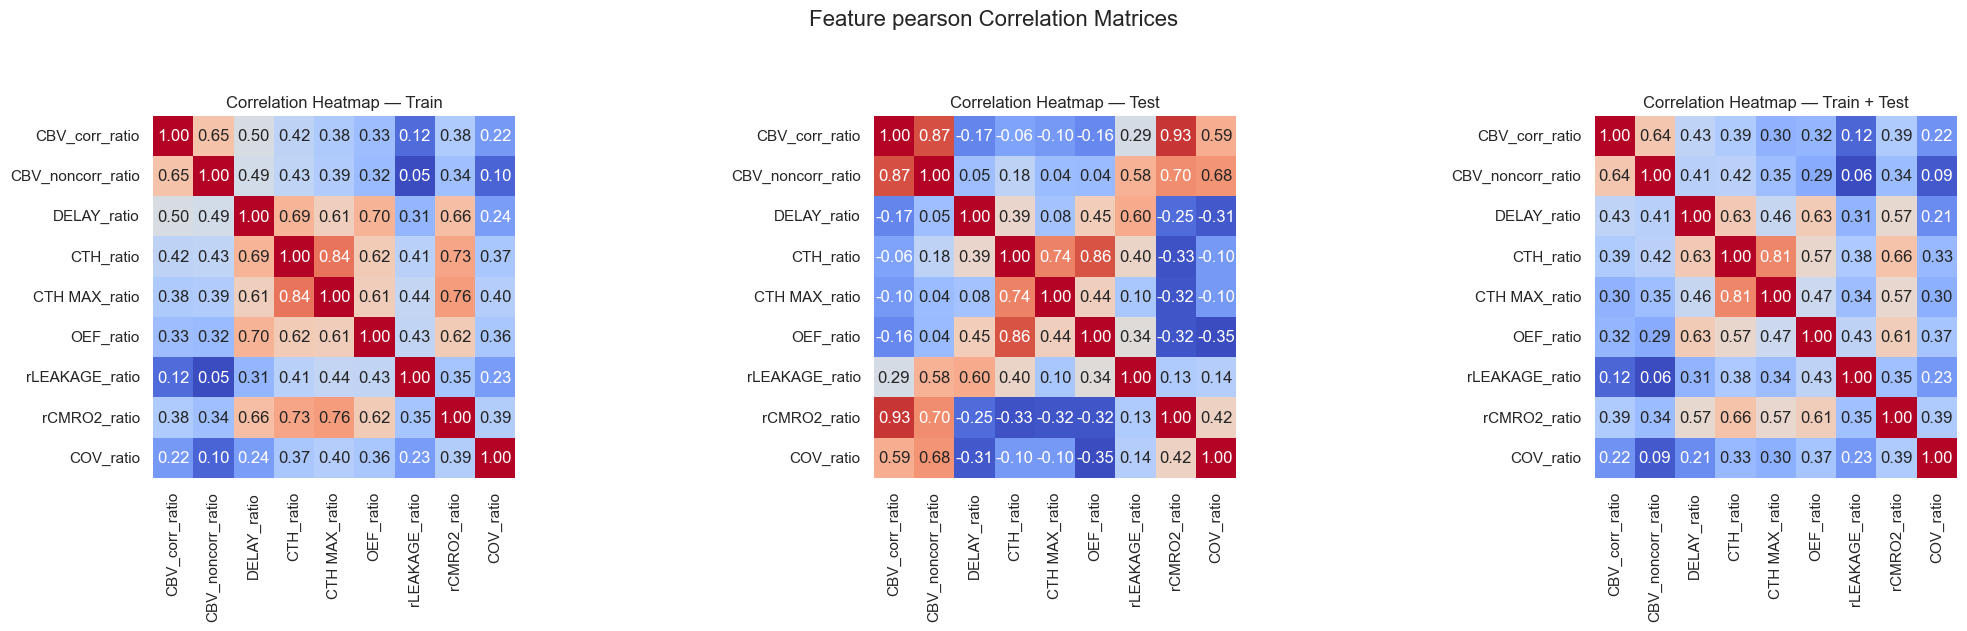

In [8]:
mb.plot_correlation_heatmap(method="pearson")

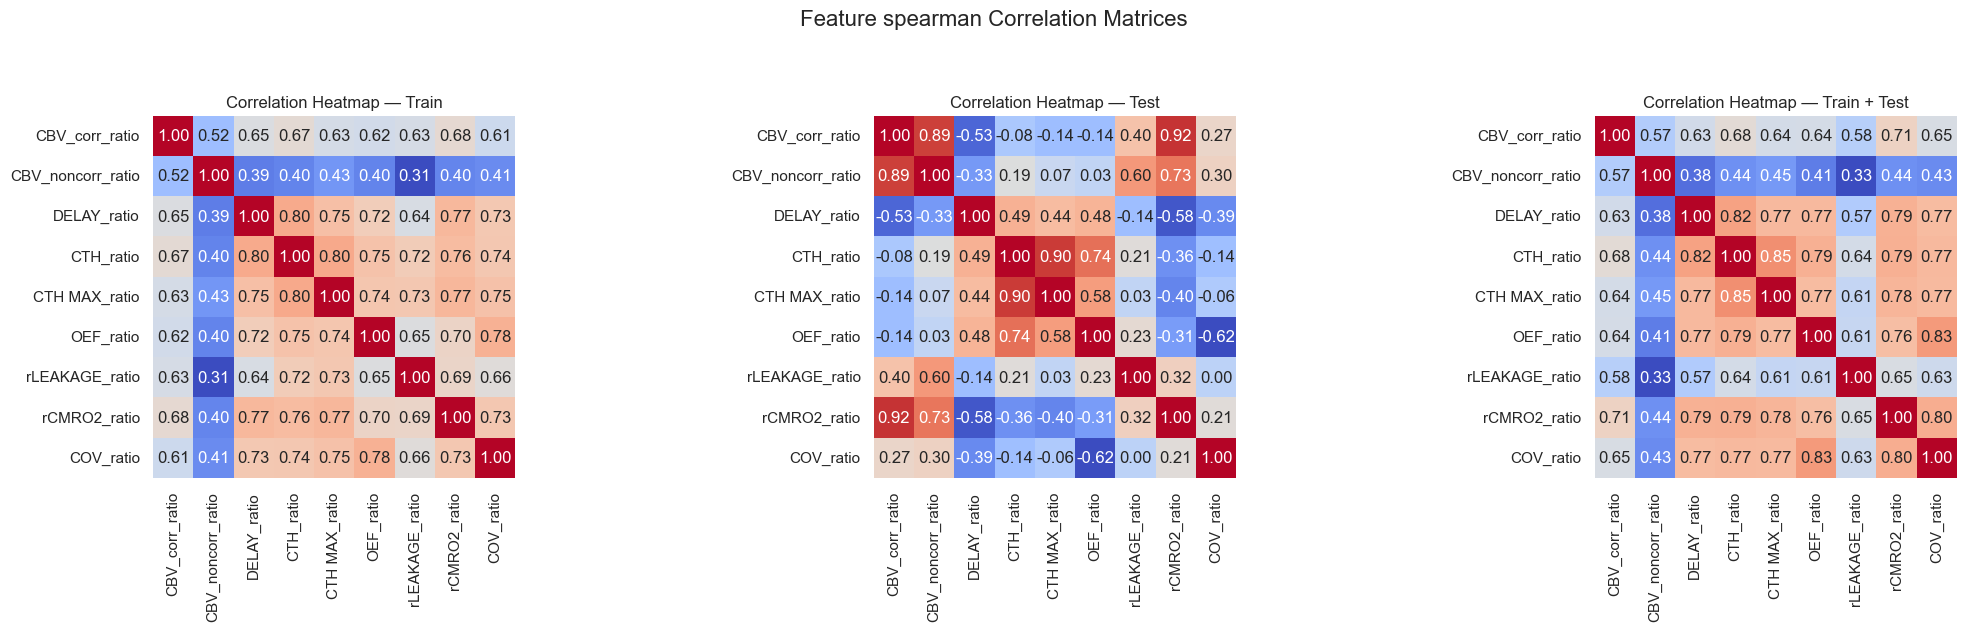

In [9]:
mb.plot_correlation_heatmap(method="spearman")

## 6. PairPlot : 

In [10]:
# mb.plot_feature_pairplot(s=20, alpha=0.8, lower=0.00, upper=0.99)

## 7. XGBoost : 

In [11]:
# mb.evaluate_xgboost_model(max_depth=3, n_estimators=100, learning_rate=0.1, eval_metric="logloss", use_label_encoder=False, reg_alpha=0.5, 

## 8. Random Forest

In [12]:
# mb.evaluate_random_forest_model(n_estimators=1000,max_depth=3,max_features=2/9, bootstrap=True)

In [13]:
param_grid = {
    "n_estimators": [10, 20, 50, 100],
    "max_depth": [1, 2, 3, 4, 5, None],
    "max_features": list(range(1, len(BIOMARKERS) + 1)) + [None],
    "bootstrap": [True, False],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 6]
}

In [14]:
# best_config, best_auc, results = mb.grid_search_random_forest(param_grid)


In [15]:
# mb.evaluate_random_forest_model(**best_config)

In [ ]:
from itertools import combinations

subsets = []
for r in range(1, len(BIOMARKERS) + 1):
    subsets.extend(combinations(BIOMARKERS, r))

assert len(subsets) == 2**len(BIOMARKERS) - 1, f"Subsets of BIOMARKERS not complete"

best_auc, best_config = 0, None

for subset in subsets:

    print("\n" + "=" * 150)

    print(f"Subset : {subset}")
    
    _mb = MultiBiomarker(biomarkers=subset, data = df_data, test_data=df_test)
    param_grid = {
        "n_estimators": [10, 20, 50, 100],
        "max_depth": [1, 2, 3, 4, 5, None],
        "max_features": list(range(1, len(subset) + 1)) + [None],
        "bootstrap": [True, False],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4, 6]
    }
    _best_config, _best_auc, _ = _mb.grid_search_random_forest(param_grid)

    if _best_auc > best_auc:
        best_config = _best_config
        best_auc = _best_auc
    print("\n" + "=" * 150)



Subset : ('CBV_corr',)


  0%|          | 0/1152 [00:00<?, ?it/s]

Grid search over 1152 combinations...
